<a href="https://colab.research.google.com/github/Kuldeep2003-exe/googleAi/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5.2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted output for x = 7: 3.21


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


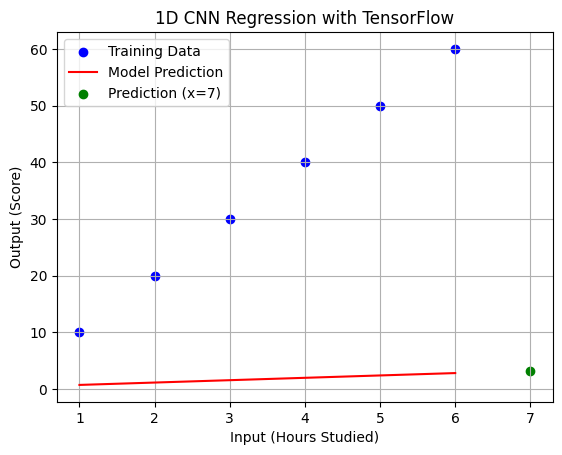

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1, 2, 3, 4, 5, 6], dtype=float).reshape((6, 1, 1))
y_train = np.array([10, 20, 30, 40, 50, 60], dtype=float)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=200, verbose=0)

x_test = np.array([7.0]).reshape((1, 1, 1))
y_pred = model.predict(x_test)
print(f"Predicted output for x = 7: {y_pred[0][0]:.2f}")

plt.scatter(x_train.flatten(), y_train, color='blue', label='Training Data')
plt.plot(x_train.flatten(), model.predict(x_train).flatten(), color='red', label='Model Prediction')
plt.scatter(x_test.flatten(), y_pred.flatten(), color='green', label='Prediction (x=7)')
plt.xlabel("Input (Hours Studied)")
plt.ylabel("Output (Score)")
plt.title("1D CNN Regression with TensorFlow")
plt.legend()
plt.grid(True)
plt.show()


5.3 Fashion MNIST – Modified Neural Network with Scaled Outputs

a. Try different scaling strategies (e.g., modifying logits before softmax).

b. Add a custom layer or function to simulate uncertainty or confidence adjustments.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

logits_scale = 1.5

inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
logits = tf.keras.layers.Dense(10)(x)
scaled_logits = tf.keras.layers.Lambda(lambda z: z * logits_scale)(logits)
outputs = tf.keras.layers.Softmax()(scaled_logits)
model_scaled_logits = tf.keras.Model(inputs=inputs, outputs=outputs)
model_scaled_logits.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
model_scaled_logits.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_scaled_logits.evaluate(test_images, test_labels)
print(f"Test Accuracy with scaled logits: {test_acc * 100:.2f}%")

class UncertaintyLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.log_var = self.add_weight(name='log_var', shape=(), initializer='zeros', trainable=True)
    def call(self, inputs, training=None):
        if training:
            noise = tf.random.normal(tf.shape(inputs), mean=0.0, stddev=tf.exp(0.5 * self.log_var))
            return inputs + noise
        else:
            return inputs

inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
logits = tf.keras.layers.Dense(10)(x)
logits_with_uncertainty = UncertaintyLayer()(logits)
outputs = tf.keras.layers.Softmax()(logits_with_uncertainty)
model_uncertainty = tf.keras.Model(inputs=inputs, outputs=outputs)
model_uncertainty.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
model_uncertainty.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_uncertainty.evaluate(test_images, test_labels)
print(f"Test Accuracy with uncertainty layer: {test_acc * 100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7912 - loss: 0.5846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8899 - loss: 0.2967
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9083 - loss: 0.2479
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9214 - loss: 0.2143
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9301 - loss: 0.1892
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9037 - loss: 0.2726
Test Accuracy with scaled logits: 90.60%
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7337 - loss: 0.7537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8754 - loss: 0.3400
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8983 - loss: 0.2754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9142 - loss: 0.2322
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9235 - loss: 0

5.4 Fashion MNIST with CNN + Pooling + Scaled Output

a. Plot Training vs Validation Accuracy/Loss.

b.Use Callbacks (EarlyStopping / ModelCheckpoint)

c. Data Augmentation

d. Confusion Matrix + Classification Report


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6431 - loss: 0.1708

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 36ms/step - accuracy: 0.6432 - loss: 0.1708 - val_accuracy: 0.7843 - val_loss: 0.1030
Epoch 2/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8018 - loss: 0.0956

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.8018 - loss: 0.0956 - val_accuracy: 0.8028 - val_loss: 0.0945
Epoch 3/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8272 - loss: 0.0838

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.8272 - loss: 0.0838 - val_accuracy: 0.8125 - val_loss: 0.0917
Epoch 4/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8472 - loss: 0.0753

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8472 - loss: 0.0753 - val_accuracy: 0.8387 - val_loss: 0.0772
Epoch 5/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8543 - loss: 0.0716

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8543 - loss: 0.0716 - val_accuracy: 0.8527 - val_loss: 0.0726
Epoch 6/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8656 - loss: 0.0668

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8656 - loss: 0.0668 - val_accuracy: 0.8602 - val_loss: 0.0685
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8683 - loss: 0.0658 - val_accuracy: 0.8590 - val_loss: 0.0694
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8736 - loss: 0.0623 - val_accuracy: 0.8602 - val_loss: 0.0685
Epoch 9/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8766 - loss: 0.0607

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8766 - loss: 0.0607 - val_accuracy: 0.8795 - val_loss: 0.0634
Epoch 10/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8830 - loss: 0.0575 - val_accuracy: 0.8597 - val_loss: 0.0711
Epoch 11/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8895 - loss: 0.0552

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.8895 - loss: 0.0552 - val_accuracy: 0.8772 - val_loss: 0.0630
Epoch 12/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8882 - loss: 0.0561

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8882 - loss: 0.0561 - val_accuracy: 0.8772 - val_loss: 0.0629
Epoch 13/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8886 - loss: 0.0553 - val_accuracy: 0.8777 - val_loss: 0.0632
Epoch 14/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8924 - loss: 0.0529

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.8924 - loss: 0.0529 - val_accuracy: 0.8813 - val_loss: 0.0614
Epoch 15/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.8957 - loss: 0.0520 - val_accuracy: 0.8793 - val_loss: 0.0620
Epoch 16/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8960 - loss: 0.0521

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8960 - loss: 0.0521 - val_accuracy: 0.8852 - val_loss: 0.0600
Epoch 17/20
1686/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8972 - loss: 0.0524

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8972 - loss: 0.0524 - val_accuracy: 0.8903 - val_loss: 0.0586
Epoch 18/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.8981 - loss: 0.0503 - val_accuracy: 0.8775 - val_loss: 0.0604
Epoch 19/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9029 - loss: 0.0494 - val_accuracy: 0.8842 - val_loss: 0.0595
Epoch 20/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9002 - loss: 0.0494

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9002 - loss: 0.0494 - val_accuracy: 0.8897 - val_loss: 0.0569
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8848 - loss: 0.0587
Test Accuracy: 88.61%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


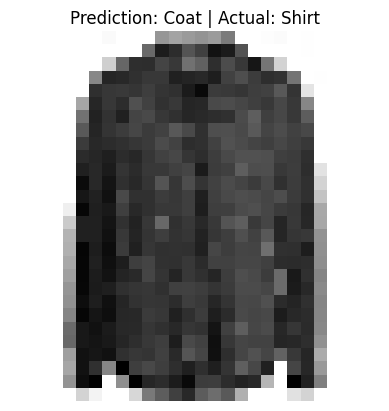

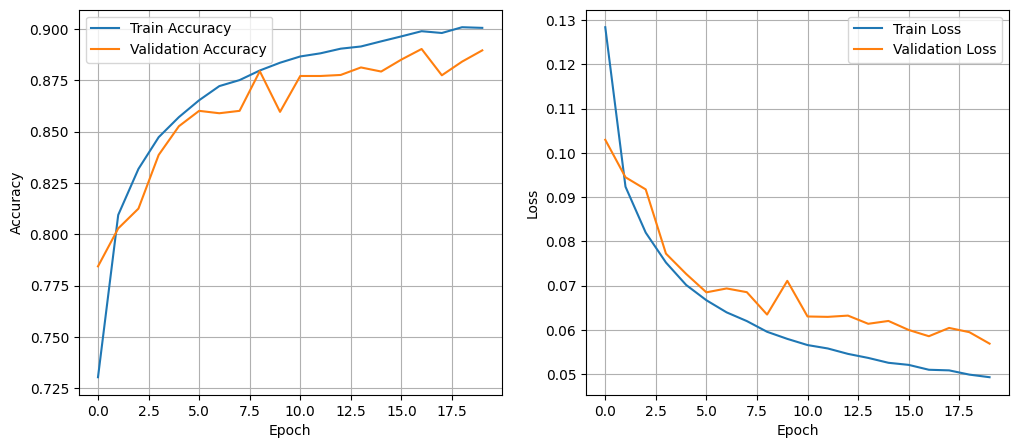

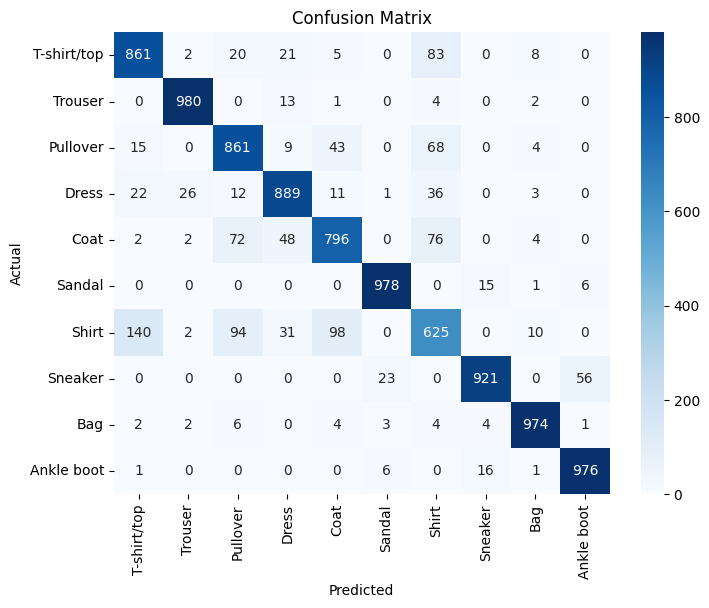

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.97      0.98      0.97      1000
    Pullover       0.81      0.86      0.83      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.83      0.80      0.81      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.70      0.62      0.66      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

train_labels_cat = tf.one_hot(train_labels, depth=10)
test_labels_cat = tf.one_hot(test_labels, depth=10)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

inputs = tf.keras.Input(shape=(28, 28, 1))
x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2, 2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(train_images, train_labels_cat, epochs=20, validation_split=0.1,
                    callbacks=[early_stop, checkpoint])

test_loss, test_accuracy = model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def display_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Prediction: {class_names[pred_labels[index]]} | Actual: {class_names[test_labels[index]]}")
    plt.axis('off')
    plt.show()

display_prediction(44)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_labels, pred_labels, target_names=class_names))


5.5 Fashion MNIST Mini Project: Scaled Output Neural Network

a. Add a Slider to Explore Predictions Interactively

b. Display Top-3 Predicted Classes

c. Plot Training vs Validation Accuracy

d. Visualize Feature Maps

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7497 - loss: 0.1330 - val_accuracy: 0.8486 - val_loss: 0.0775
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8559 - loss: 0.0745 - val_accuracy: 0.8646 - val_loss: 0.0681
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8683 - loss: 0.0661 - val_accuracy: 0.8758 - val_loss: 0.0637
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8816 - loss: 0.0603 - val_accuracy: 0.8800 - val_loss: 0.0619
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8873 - loss: 0.0569 - val_accuracy: 0.8783 - val_loss: 0.0609


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7312 - loss: 0.1356 - val_accuracy: 0.8663 - val_loss: 0.0679
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8748 - loss: 0.0634 - val_accuracy: 0.8888 - val_loss: 0.0559
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8966 - loss: 0.0522 - val_accuracy: 0.8961 - val_loss: 0.0528
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9112 - loss: 0.0451 - val_accuracy: 0.8988 - val_loss: 0.0506
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9208 - loss: 0.0408 - val_accuracy: 0.9048 - val_loss: 0.0476
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9012 - loss: 0.0513
CNN Test Accuracy: 90.09%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


IntSlider(value=0, description='Image Index', max=9999)

Output()

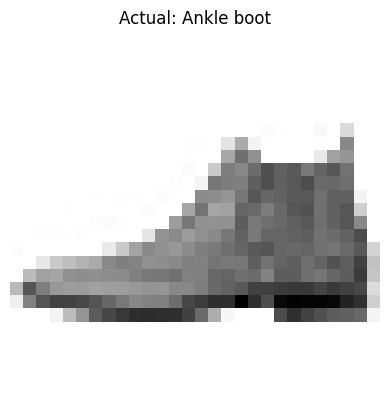

Top 3 Predictions:
Ankle boot: 99.14%
Sandal: 0.32%
Sneaker: 0.04%


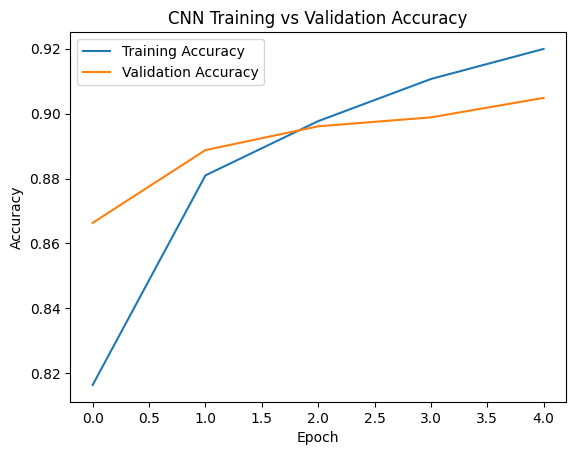

AttributeError: The layer sequential_9 has never been called and thus has no defined input.

In [5]:
# Step 1: Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Step 2: Load and Preprocess Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 3: Define and Train the Dense Model (Baseline)
model_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')  # scaled output 0-1
])
model_dense.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_dense = model_dense.fit(train_images, tf.one_hot(train_labels, 10),
                                epochs=5, validation_split=0.2)

# Step 4: Define and Train the CNN Model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name='conv1'),
    tf.keras.layers.MaxPooling2D((2,2), name='max_pool1'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', name='conv2'),
    tf.keras.layers.MaxPooling2D((2,2), name='max_pool2'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(train_images_cnn, tf.one_hot(train_labels, 10),
                            epochs=5, validation_split=0.2)

# Step 5: Evaluate CNN model
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, tf.one_hot(test_labels, 10))
print(f"CNN Test Accuracy: {test_acc_cnn*100:.2f}%")

# Step 6: Predictions with CNN model
predictions = model_cnn.predict(test_images_cnn)

# Step 7: Display Prediction Function with Top-3 predictions
def display_prediction(index):
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(f"Actual: {class_names[test_labels[index]]}")
    plt.show()

    probs = predictions[index]
    top_3_idx = probs.argsort()[-3:][::-1]
    print("Top 3 Predictions:")
    for i in top_3_idx:
        print(f"{class_names[i]}: {probs[i]*100:.2f}%")

# Step 8: Interactive slider to explore test images
slider = widgets.IntSlider(min=0, max=len(test_images)-1, step=1, description='Image Index')
out = widgets.Output()

def on_value_change(change):
    with out:
        out.clear_output()
        display_prediction(change['new'])

slider.observe(on_value_change, names='value')
display(slider, out)

# Show initial image predictions
display_prediction(0)

# Step 9: Plot Training vs Validation Accuracy for CNN
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()

# Step 10: Visualize Feature Maps from CNN intermediate layers
img = test_images_cnn[0:1]  # batch size 1

# ✅ Call the model to build it before accessing .input
_ = model_cnn(img)

# Extract outputs from conv and pool layers
layer_outputs = [layer.output for layer in model_cnn.layers if 'conv' in layer.name or 'max_pool' in layer.name]
activation_model = tf.keras.models.Model(inputs=model_cnn.input, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(img)

# Visualize feature maps layer-wise
for layer_name, layer_activation in zip(
    [layer.name for layer in model_cnn.layers if 'conv' in layer.name or 'max_pool' in layer.name],
    activations):

    n_features = layer_activation.shape[-1]
    cols = 8
    rows = (n_features + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.suptitle(f'Feature maps - {layer_name}')
    axes = axes.flatten()

    for i in range(n_features):
        axes[i].imshow(layer_activation[0, :, :, i], cmap='viridis')
        axes[i].axis('off')
    for i in range(n_features, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
